# Ejemplo de entrenamiento de una red neuronal MLP

Este es un ejemplo para el curso de Inteligencia Artificial 2020-I, entrenando un modelo de red neuronal MLP para el conjunto de datos iris.cvs.

El conjunto de datos Iris contiene datos sobre tres tipos de flores Iris. Este es un conjunto de datos multi-variables construidos por Edgar Anderson para cuantificar la variación morfológica de tres especies de flores de iris.

El conjunto de datos contiene tres clases de flores que son: Iris Setosa, Iris Versicolour, e Iris Virginica. Cada clase cuenta con 50 ejemplos registrados, para un total de 150 ejemplos en el conjunto de datos. 

Los atributos, variables independientes, o características registrados para cada ejemplo son:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm

El conjunto de datos está disponible en: https://archive.ics.uci.edu/ml/datasets/Iris/

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV

Cargando el conjunto de datos de un archivo extensión .cvs, y mostrando información del archivo.

In [132]:
#Cargando datos
wine = pd.read_csv("C:/Users/pamen/OneDrive/Documents/IA Andres/winequality-red.csv")
#Informacion de los datos
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


Al entrenar un modelo de aprendizaje de máquinas se hace necesario dividir el conjunto de datos en un conjunto de datos de entrenamiento y otro de prueba. El objetivo de esta evaluación es obtener una evaluación más objetiva del modelo obtenido. En ocasiones los modelos entrenados quedan sobre ajustados a los datos que se utilizan en el entrenamiento, esto es en el caso de las redes neuronales los pesos del modelo se ajustaran tan bien a los casos de entrenamiento de tal manera que se puede observar un muy buen desempeño del modelo; pero cuando llega un nuevo caso diferente a los casos utilizados en el entrenamiento, el modelo falla. Por esta razón es recomendable reservar unos cuantos casos o ejemplos para evaluar el modelo al final del entrenamiento. En este ejemplo se está tomando un 20 por ciento de todos los casos en el archivo cargado como datos para prueba.

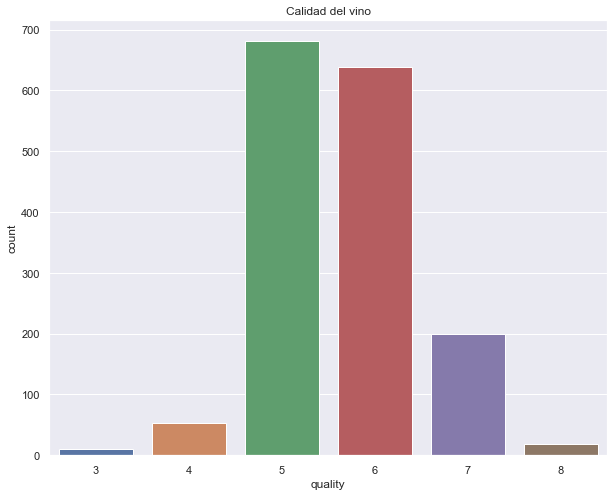

In [133]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot('quality',data=wine)
plt.title("Calidad del vino")
plt.show()

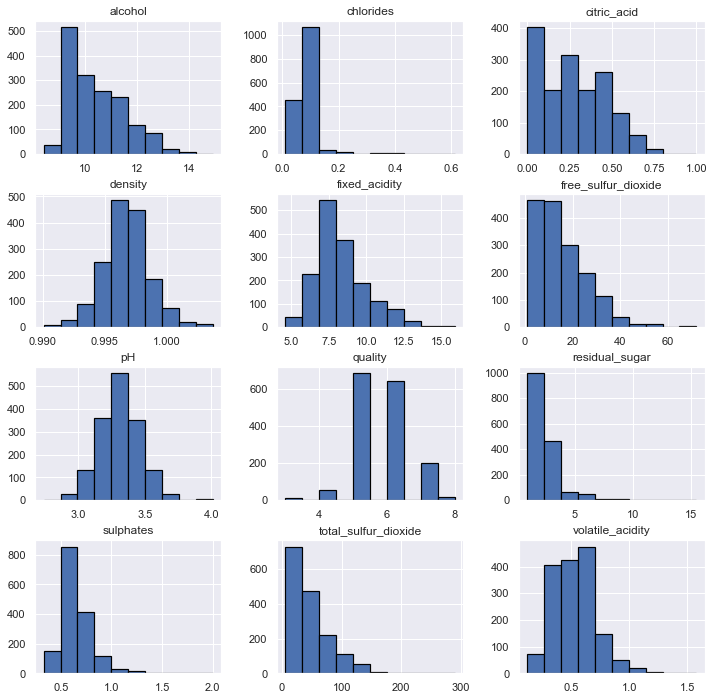

In [134]:
wine.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

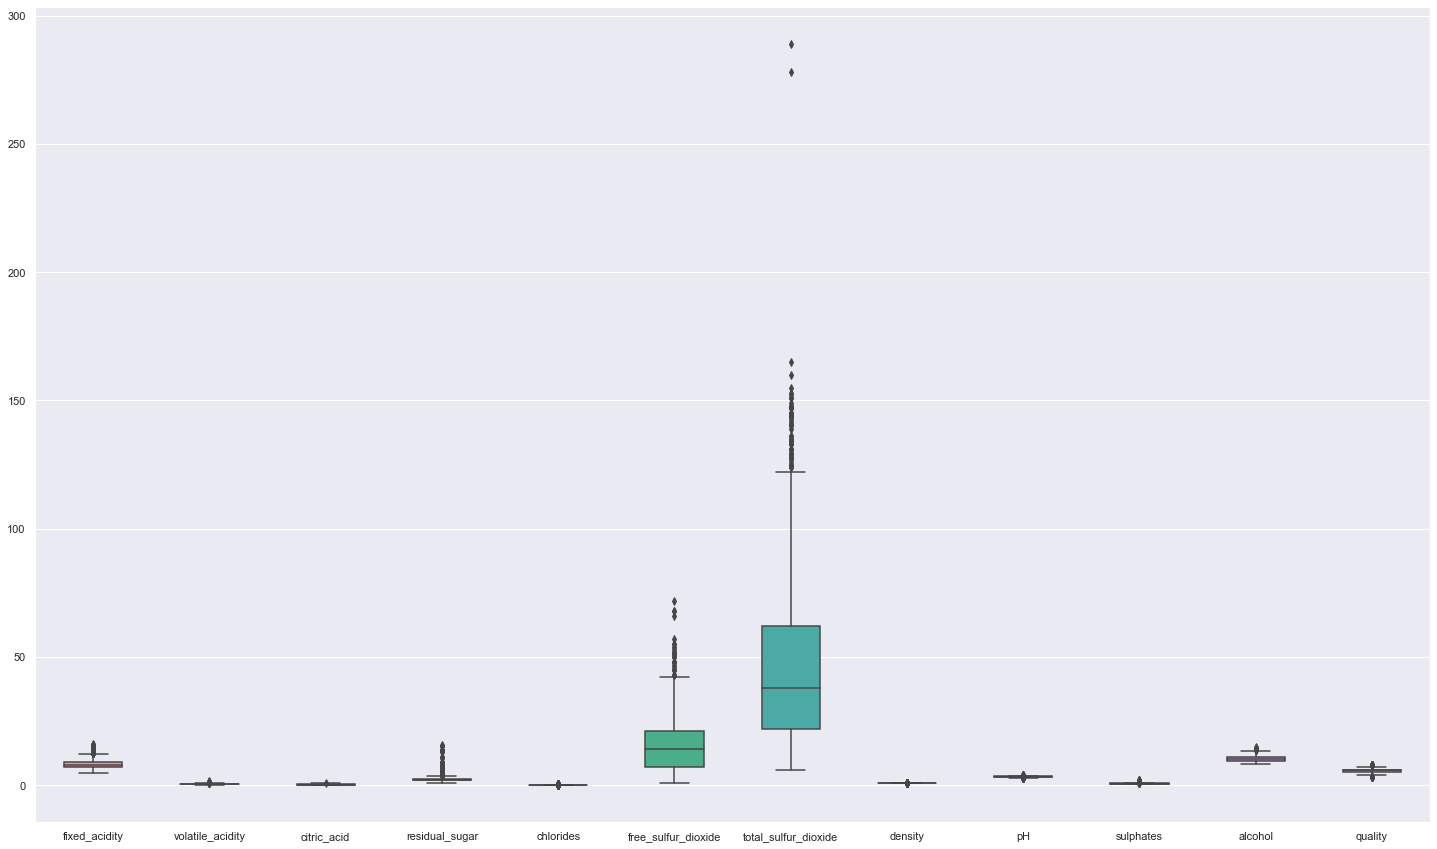

In [135]:
box_data = wine #variable representing the data array
box_target = wine.quality #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5)
sns.set(rc={'figure.figsize':(25,15)})
plt.show()

In [136]:
#Separando los datos en conjuntos de entrenaimiento y prueba
#fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
X = wine[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']].values #X variables de entradas o independientes
y = np.ravel(wine[['quality']].values)   #y variable de salida o dependiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) #Se modificó el tamaño de prueba de un 20% a un 30%.

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.256131     0.671703   
volatile_acidity          -0.256131          1.000000    -0.552496   
citric_acid                0.671703         -0.552496     1.000000   
residual_sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free_sulfur_dioxide       -0.153794         -0.010504    -0.060978   
total_sulfur_dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity               0.114777   0.093705            -0.153794   
volatile_acidity            0.001918   0.061298            -0.010504   
citric_acid                 0.143577   0.203823            -0.060978   
residual_su

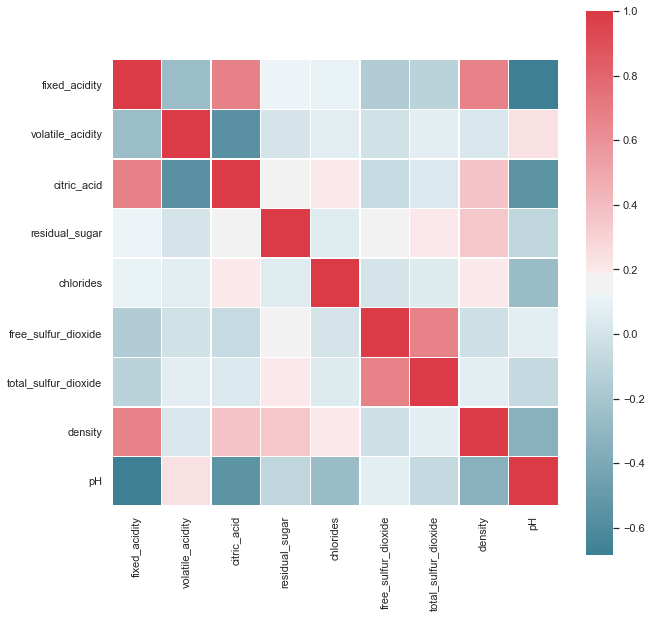

In [137]:
X = wine.iloc[:, 0:9]
f, ax = plt.subplots(figsize=(10, 10))
corr = X.corr()
print(corr)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
          cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, linewidths=.5)
plt.show() 

Ahora vamos a configurar nuestro primer modelo de red neuronal. MLPClassifier permite configurar las capas ocultas del modelo, la instrucción de abajo indica que el modelo tendrá dos capas ocultas cada una con 3 neuronas. Algo como esto hidden_layer_sizes = (3,3,2) quiere decir que se tendrían tres capas ocultas con 3,3 y 2 neuronas respectivamente. El número de neuronas de la capa de entrada es el número de variables de entrada de los datos de entrenamiento, y el número de neuronas de la capa de salida depende del número de clases a predecir. Para este caso es 4 variables. Alpha es la tasa de aprendizaje utilizado para la actualización de los pesos y max_iter es el número de iteraciones máximos en los que se ajustaran los pesos del modelo. La segunda instrucción realiza el proceso de entrenamiento sobre los datos de entrenamiento.

In [138]:
#Entrenando un modelo de red neuronal MLP para clasificación
model =  MLPClassifier(hidden_layer_sizes = (3,3), alpha=0.01, max_iter=1500) 
model.fit(X_train, y_train) #Training the model

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Una vez entrenado el modelo, debemos evaluarlo sobre el conjunto de datos reservado para prueba, y utilizar algunas métricas para observar que tan bien quedo entrenado el modelo. En esta primera prueba utilizamos como métricas el porcentaje de precisión del modelo y la matriz de confusión. El porcentaje de predicción me indica cuantos casos del conjunto de prueba fueron correctamente clasificados, se expresa en porcentaje, lo que quiere decir que entre más cercano al 100 por ciento se encuentre, significa que el modelo funciona muy bien sobre el conjunto de prueba. En muchos casos debido a la existencia de errores o datos atípicos, el porcentaje alcanzado no llega a 100; pero se puede considerar que un porcentaje por encima del 80 por ciento es un buen resultado dependiendo del problema que se esté resolviendo.

La matriz de confusión indica en que clases el modelo se comportó bien, y en cuales falló. Se trata de una matriz cuadrada de M x M, donde M es el número de clases del problema. Un matriz de confusión excelente debe contener valores de cero en todas las posiciones excepto en la diagonal principal. Cada fila corresponde a una clase y cada columna también. El elemento de la fila i y columna j indica el número de casos con el verdadero valor de la clase i que fue predicho por el modelo como perteneciente la lase j.

In [139]:
#Test the model
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print("Matriz de confusión:\n%s" % metrics.confusion_matrix(y_test, predictions))

0.46458333333333335
Matriz de confusión:
[[  0   0   0   5   0   0]
 [  0   0   2  10   0   0]
 [  0   0  93 114   0   0]
 [  0   0  71 130   0   0]
 [  0   0  15  35   0   0]
 [  0   0   1   4   0   0]]


Como se puede observar los resultados de la primera prueba o modelo diseñado no son los mejores. Se debe ajustar los parámetros del modelo antes de dar una conclusión acerca del desempeño de las redes neuronales sobre el conjunto de datos Iris. Vamos a ajustar los parámetros del modelo, para esto utilizaremos GridSearch para evaluar varios parámetros a la vez sin necesidad de cambiar los valores manualmente. En la siguiente línea de código para cada parámetro del modelo se escogen los diferentes valores que se quieren evaluar.

In [140]:
param_grid = [{'hidden_layer_sizes' : [(2,2), (3,3), (4,4), (5,4)], 'max_iter':[100, 500, 1000]}, 
              {'alpha': [0.0001, 0.001, 0.01, 0.1]}]

In [141]:
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
model = MLPClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

Los mejores parámetros del modelo serán aquellos que generen la mejor precisión sobre el conjunto de entrenamiento
primero. Luego vamos a verificar el desempeño de esos parámetros en el conjunto de casos reservados para la prueba.

In [142]:
predictions = grid_search.predict(X_test)
print('Exactitud: ')
print(accuracy_score(y_test, predictions))
print("Matriz de confusión:\n%s" % metrics.confusion_matrix(y_test, predictions))

Exactitud: 
0.575
Matriz de confusión:
[[  0   0   4   1   0   0]
 [  0   0   8   4   0   0]
 [  0   0 151  55   1   0]
 [  0   0  67 113  21   0]
 [  0   0   4  34  12   0]
 [  0   0   0   1   4   0]]
